# 🩺 Diabetes Prediction using Machine Learning

This notebook demonstrates a complete machine learning pipeline for predicting diabetes using patient health data.

## Table of Contents
1. [Import Libraries](#1-import-libraries)
2. [Load & Explore Data](#2-load--explore-data)
3. [Data Cleaning](#3-data-cleaning)
4. [Feature Engineering](#4-feature-engineering)
5. [Exploratory Data Analysis (EDA)](#5-exploratory-data-analysis)
6. [Model Training & Evaluation](#6-model-training--evaluation)
7. [Results Comparison](#7-results-comparison)

---

## 1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve , accuracy_score

## 2. Load & Explore Data

Load the dataset and perform initial exploration to understand its structure, data types, and basic statistics.

In [ ]:
df = pd.read_csv('../data/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

## 3. Data Cleaning

Handle missing values, duplicates, and outliers to prepare the data for analysis.

In [6]:
df.duplicated().sum()

3854

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df['gender'].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

In [10]:
df = df[df['gender'] != 'Other']

In [11]:
df['gender'].value_counts()

gender
Female    56161
Male      39967
Name: count, dtype: int64

In [12]:
encode=LabelEncoder()
df['gender'] = encode.fit_transform(df['gender'])
df['smoking_history'] = encode.fit_transform(df['smoking_history'])

## 4. Feature Engineering

Encode categorical variables and prepare features for model training.

In [13]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,0,24.60,4.8,145,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


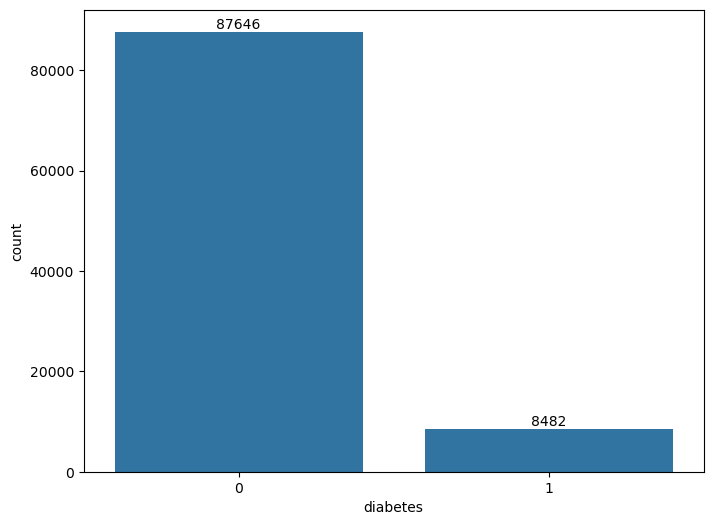

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x="diabetes", data=df)

def put_numbers_on_bar():
    ax = plt.gca()
    for p in ax.patches:
        height = int(p.get_height())
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f'{height}', (x, y), ha='center', va='bottom')


put_numbers_on_bar()

## 5. Exploratory Data Analysis (EDA)

Visualize data distributions, correlations, and relationships between features.

In [15]:
df['gender'].value_counts()

gender
0    56161
1    39967
Name: count, dtype: int64

Text(0.5, 1.0, 'Diagnos by Genders')

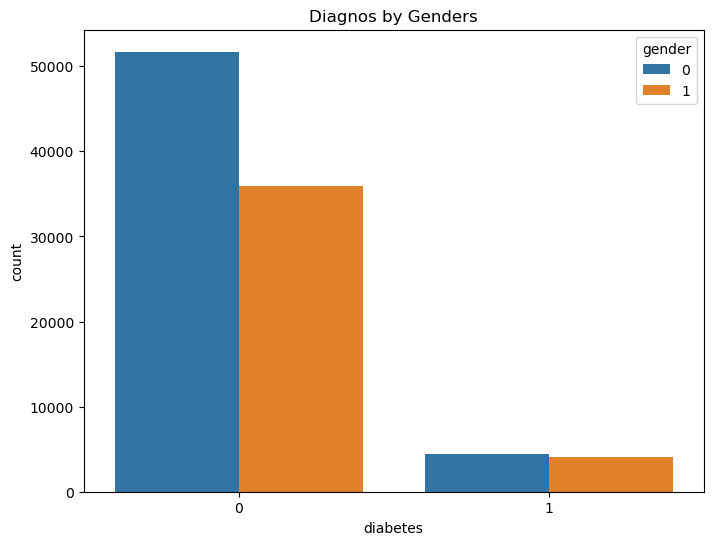

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x="diabetes", hue="gender", data=df)
plt.title("Diagnos by Genders")

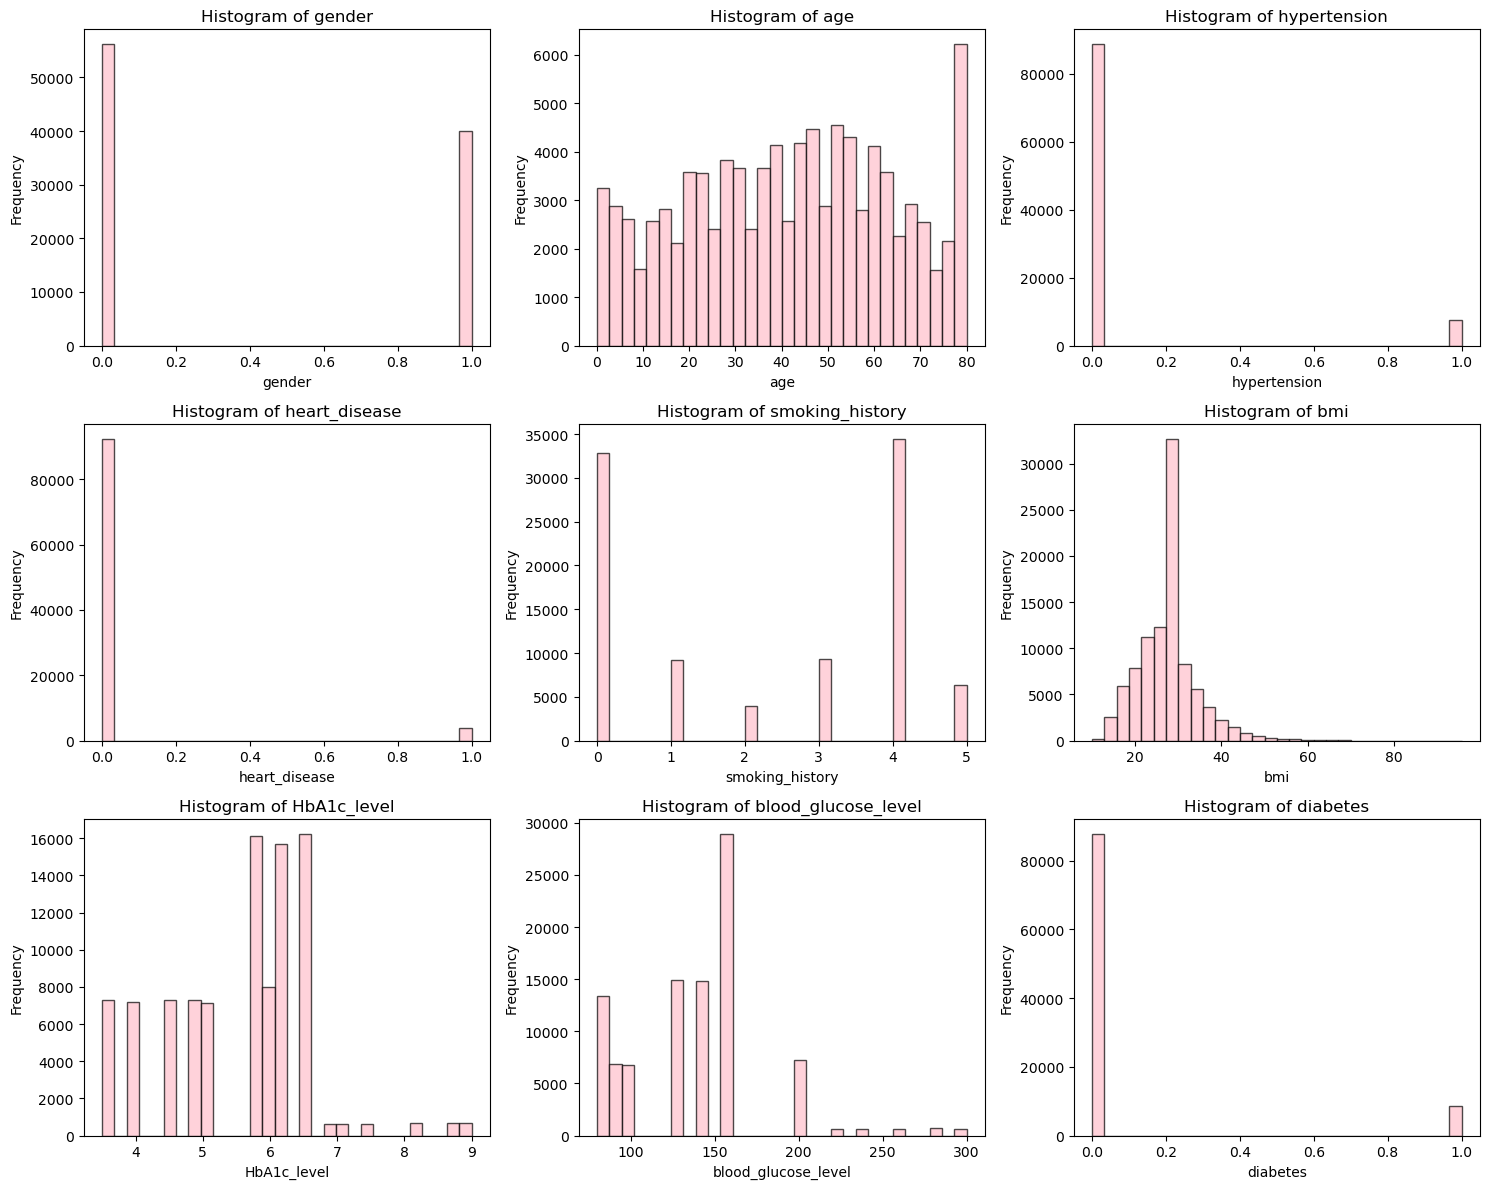

In [17]:
def simple_histograms(df, cols):
    plt.figure(figsize=(15, 12))

    for i, col in enumerate(cols):
        plt.subplot(3, 3, i + 1)
        plt.hist(df[col], bins=30, color='pink', edgecolor='black', alpha=0.7)
        plt.title(f"Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
    
    plt.tight_layout()
    plt.show()

simple_histograms(df, df.columns)

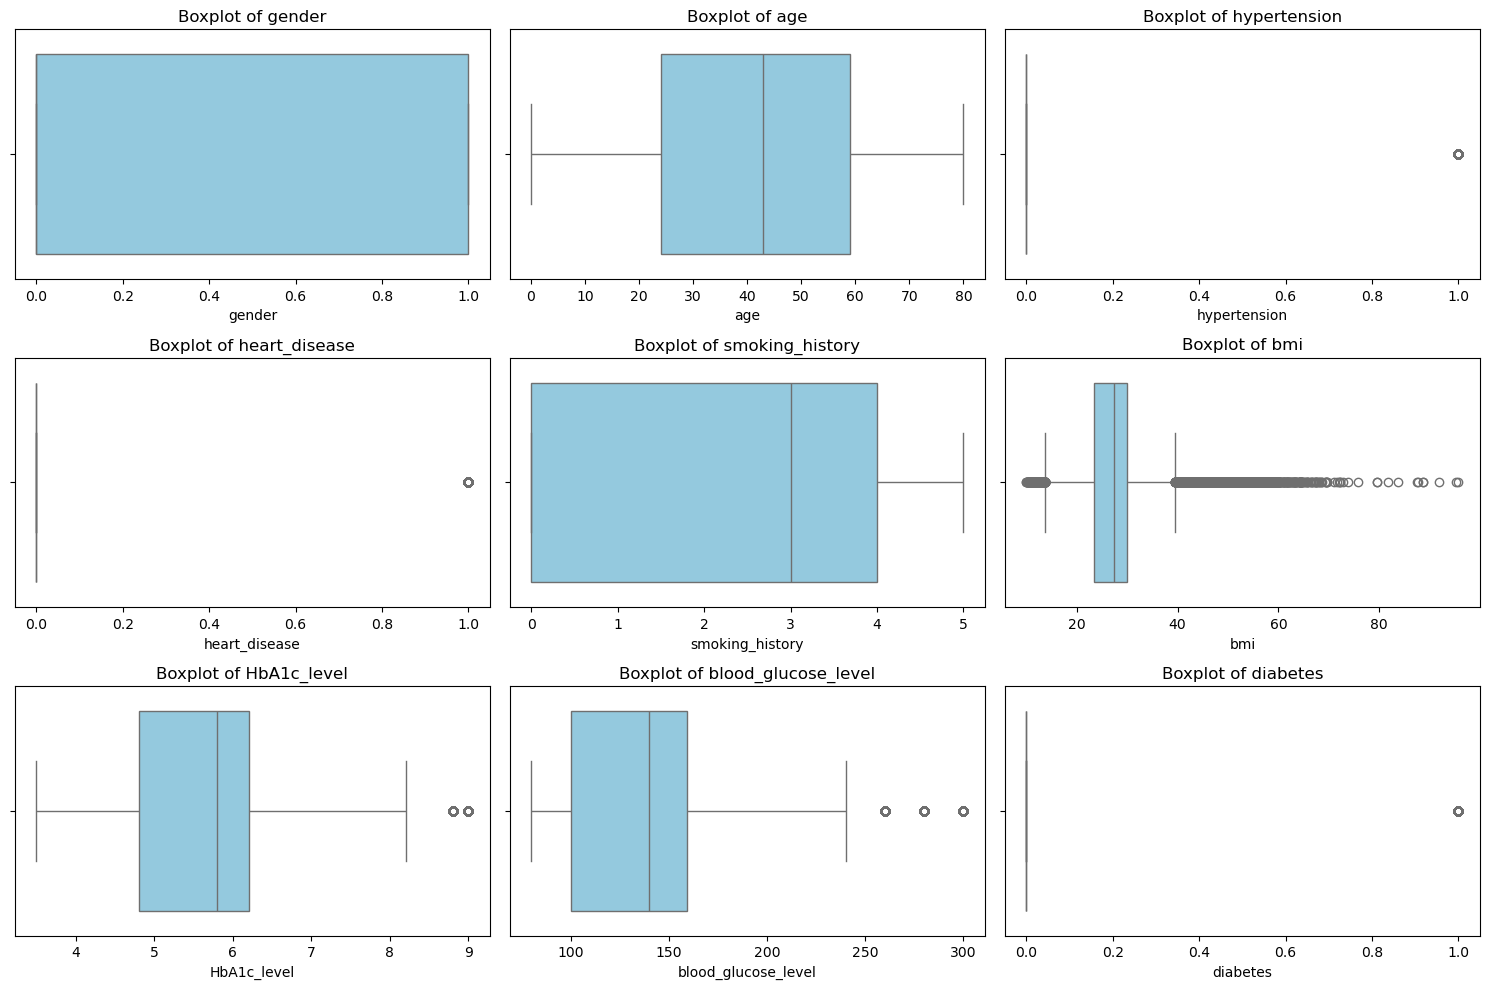

In [18]:
def simple_boxplots(df, cols):
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(cols):
        plt.subplot((len(cols) + 2) // 3, 3, i + 1)
        sns.boxplot(data=df, x=col, color="skyblue", orient='h')
        plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

simple_boxplots(df, df.columns)

In [19]:
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound,
                          np.where(df[column] > upper_bound, upper_bound, df[column]))
    return df

numeric_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

for col in numeric_cols:
    df = cap_outliers_iqr(df, col)

df[numeric_cols].describe()


,age,bmi,HbA1c_level,blood_glucose_level
count,96128.000000,96128.000000,96128.000000,96128.000000
mean,41.796617,27.030874,5.524452,137.523224
std,22.463329,5.919950,1.049488,38.640718
min,0.080000,13.710000,3.500000,80.000000
25%,24.000000,23.400000,4.800000,100.000000
50%,43.000000,27.320000,5.800000,140.000000
75%,59.000000,29.860000,6.200000,159.000000
max,80.000000,39.550000,8.300000,247.500000


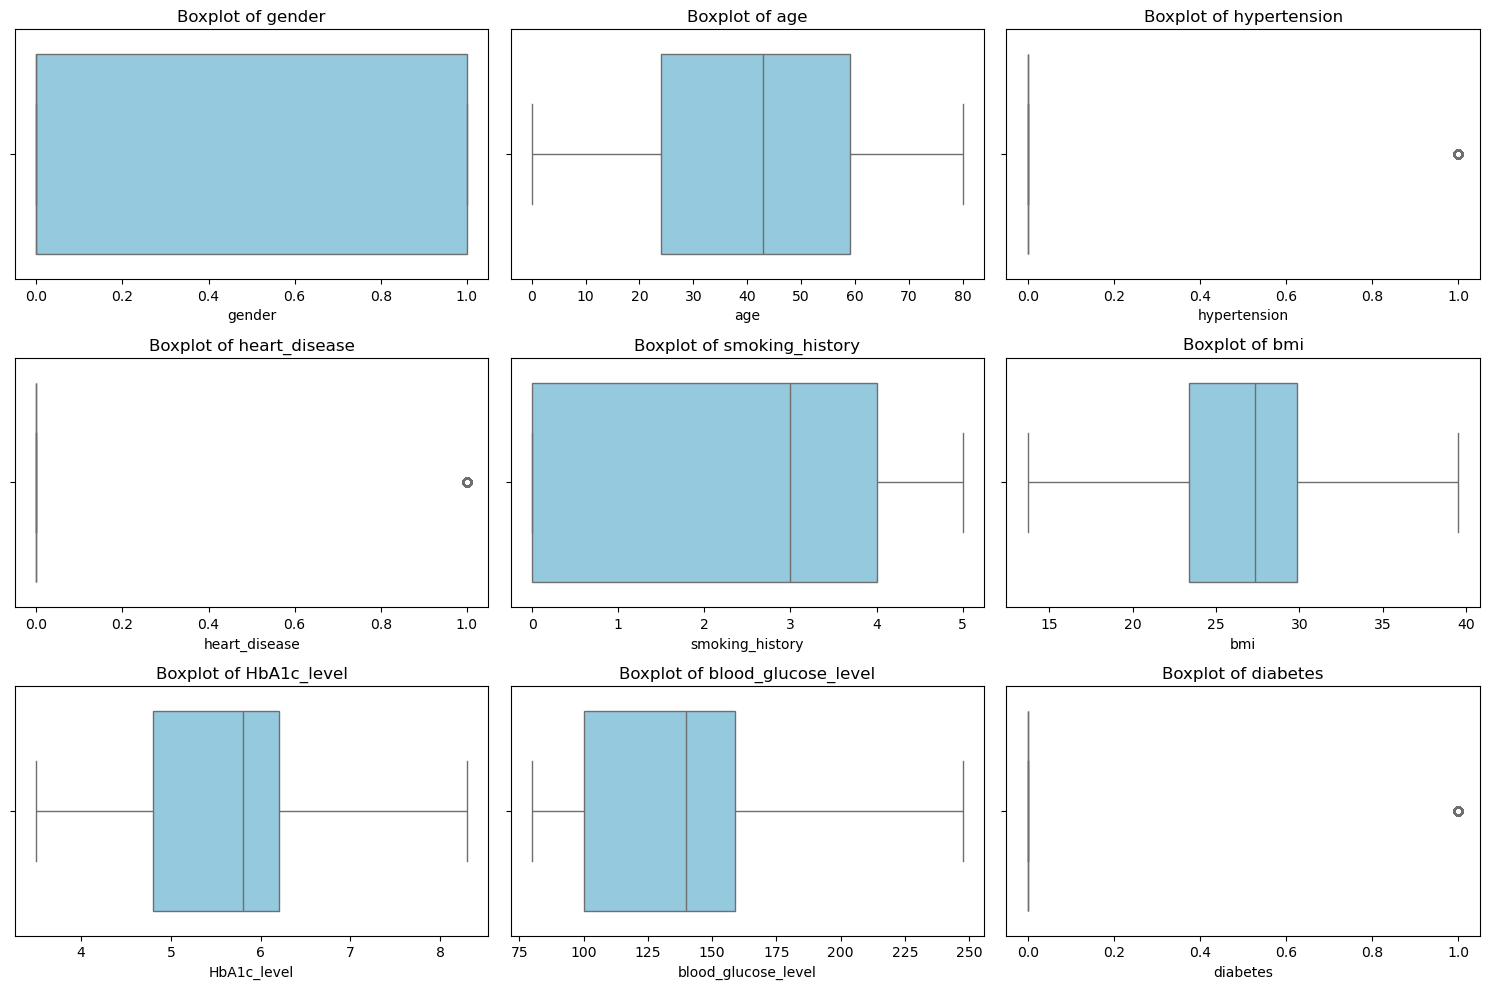

In [20]:
def simple_boxplots(df, cols):
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(cols):
        plt.subplot((len(cols) + 2) // 3, 3, i + 1)
        sns.boxplot(data=df, x=col, color="skyblue", orient='h')
        plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

simple_boxplots(df, df.columns)

In [21]:
x = df.drop(columns='diabetes')
y = df['diabetes']

## 6. Model Training & Evaluation

Split data, handle class imbalance with SMOTE, train multiple models, and evaluate their performance.

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
print("Shape of x_train is:",x_train.shape)
print("Shape of x_test is: ",x_test.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of y_test is: ",y_test.shape)

Shape of x_train is: (76902, 8)
Shape of x_test is:  (19226, 8)
Shape of y_train is: (76902,)
Shape of y_test is:  (19226,)


In [24]:
df['diabetes'].value_counts()

diabetes
0    87646
1     8482
Name: count, dtype: int64

In [25]:
smt = SMOTE(random_state=42)

x_train_resampled,y_train_resampled = smt.fit_resample(x_train,y_train)

In [26]:
print("Shape of x_train after resampling is:",x_train_resampled.shape)
print("Shape of y_train after resampling is:",y_train_resampled.shape)

Shape of x_train after resampling is: (140242, 8)
Shape of y_train after resampling is: (140242,)


In [27]:
y_train_resampled.value_counts().to_frame()

,count
diabetes,
0,70121
1,70121


In [28]:
model_1_log = LogisticRegression()


param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300],
    'class_weight': ['balanced', None]
}

grid_search = GridSearchCV(estimator=model_1_log, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

grid_search.fit(x_train_resampled, y_train_resampled)


print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy on Test Data:", grid_search.best_score_)

Best Parameters: {'C': 0.1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy on Test Data: 0.8881220256572838


In [29]:
model_1_log.fit(x_train_resampled, y_train_resampled)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
y_pred_log = model_1_log.predict(x_test)
log_accuracy = accuracy_score(y_test, y_pred_log)
print('Accuracy on test data : ', log_accuracy)

Accuracy on test data :  0.8791740351607199


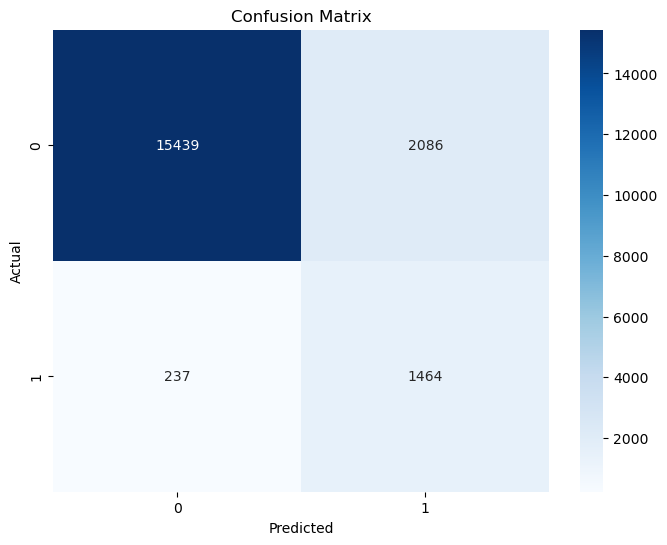

In [31]:
cm = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
model_2_rand = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
model_2_rand.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [33]:
y_pred_rand = model_2_rand.predict(x_test)

rand_accuracy = accuracy_score(y_test, y_pred_rand)
print(f"Accuracy on test data: {rand_accuracy}")


Accuracy on test data: 0.9563611775720379


In [34]:
model_3_tree = DecisionTreeClassifier(random_state=42)

model_3_tree.fit(x_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [35]:
y_pred_tree = model_3_tree.predict(x_test)

dt_accuracy = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy on test data using Decision Tree: {dt_accuracy}")

Accuracy on test data using Decision Tree: 0.9450743784458546


In [36]:
model_4_svm = SVC(C=1, kernel='rbf', gamma='scale', class_weight=None)

model_4_svm.fit(x_train_resampled, y_train_resampled)

SVC(C=1)

In [ ]:
# Predict using SVM
y_pred_svm = model_4_svm.predict(x_test)

# Calculate accuracy for SVM
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy on test data using SVM: {svm_accuracy}")

Accuracy on test data using SVM: 0.8729324872568397


In [38]:
model_5_knn = KNeighborsClassifier(n_neighbors=5)
model_5_knn.fit(x_train_resampled, y_train_resampled)

KNeighborsClassifier()

In [39]:
y_pred_knn = model_5_knn.predict(x_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy on test data using KNN: {knn_accuracy}")

Accuracy on test data using KNN: 0.8884323312181421


In [40]:
model_6_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model_6_xgb.fit(x_train_resampled, y_train_resampled)

C:\Users\Eng. Ramez\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [05:35:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [41]:
y_pred_xgb = model_6_xgb.predict(x_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy on test data using XGBoost: {xgb_accuracy}")

Accuracy on test data using XGBoost: 0.962342660979923


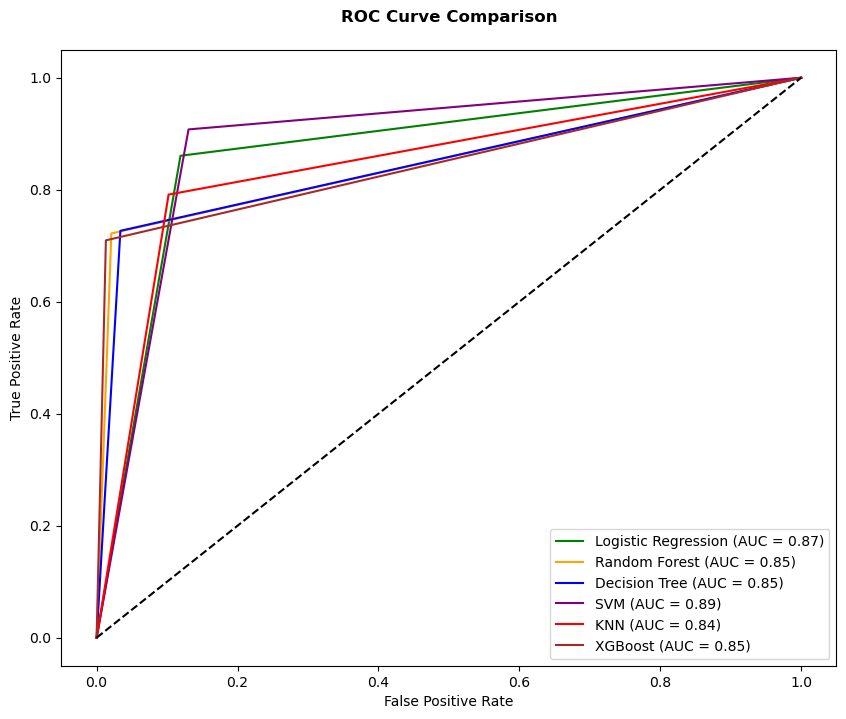

In [42]:
# Calculate ROC and AUC for all models
# Logistic Regression
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred_log)
lr_auc = roc_auc_score(y_test, y_pred_log)

# Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_pred_rand)
rf_auc = roc_auc_score(y_test, y_pred_rand)

# Decision Tree
dt_fpr, dt_tpr, _ = roc_curve(y_test, y_pred_tree)
dt_auc = roc_auc_score(y_test, y_pred_tree)

# SVM
svm_fpr, svm_tpr, _ = roc_curve(y_test, y_pred_svm)
svm_auc = roc_auc_score(y_test, y_pred_svm)

# KNN
knn_fpr, knn_tpr, _ = roc_curve(y_test, y_pred_knn)
knn_auc = roc_auc_score(y_test, y_pred_knn)

# XGBoost
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, y_pred_xgb)
xgb_auc = roc_auc_score(y_test, y_pred_xgb)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {lr_auc:.2f})", color="green")
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.2f})", color="orange")
plt.plot(dt_fpr, dt_tpr, label=f"Decision Tree (AUC = {dt_auc:.2f})", color="blue")
plt.plot(svm_fpr, svm_tpr, label=f"SVM (AUC = {svm_auc:.2f})", color="purple")
plt.plot(knn_fpr, knn_tpr, label=f"KNN (AUC = {knn_auc:.2f})", color="red")
plt.plot(xgb_fpr, xgb_tpr, label=f"XGBoost (AUC = {xgb_auc:.2f})", color="brown")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison", pad=20, fontweight="bold")
plt.legend()
plt.show()

## 7. Results Comparison

Compare model performance using ROC curves and accuracy metrics to identify the best model.

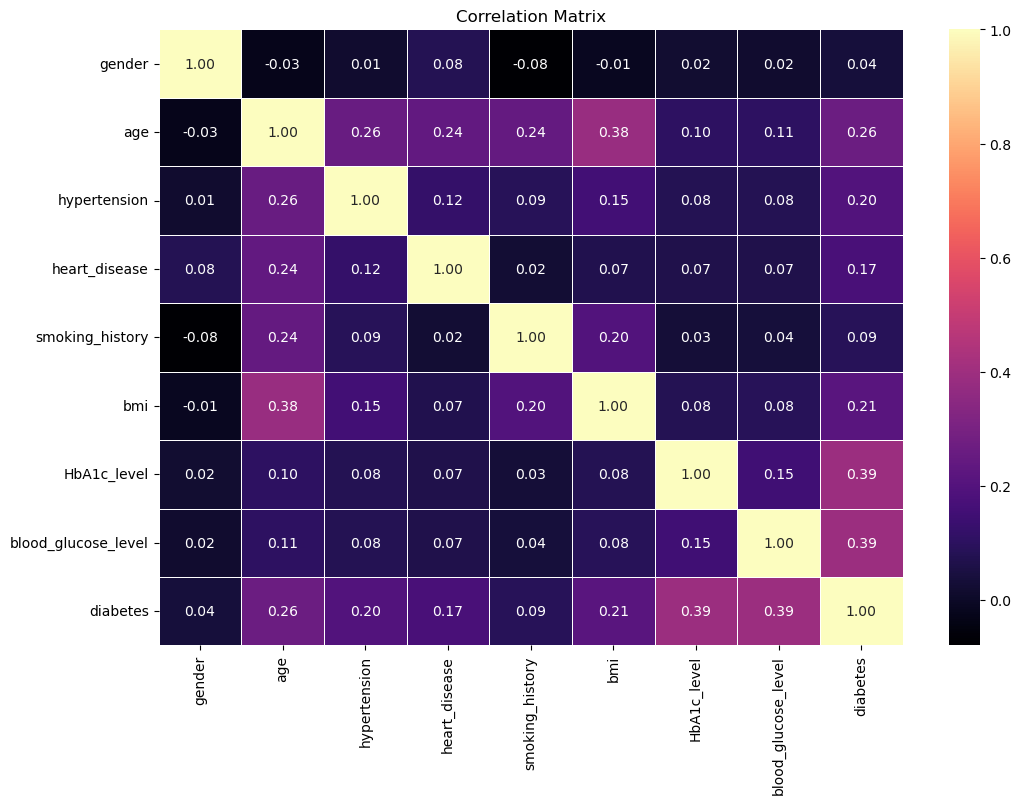

In [43]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='magma', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()